In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm

sns.set_style('darkgrid')
sns.set_palette("colorblind6")
plt.rcParams['scatter.edgecolors'] = 'none'
plt.rcParams['patch.edgecolor'] = 'none'

# 1. Преварительный просмотр данных

In [258]:
data_path = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), r'dataset/rent.csv')

df = pd.read_csv(data_path, sep=';')

In [259]:
df.head(10)

,rent,s,floor,rooms,district,walls,furniture
0,15000,35.0,5,1,3,1,1
1,16500,31.0,2,1,2,0,1
2,18000,30.0,4,1,3,1,1
3,30000,55.0,1,2,3,1,1
4,12000,19.0,3,1,2,1,1
5,18000,45.0,7,1,2,0,1
6,22500,65.0,4,2,3,1,1
7,13500,20.0,2,1,2,0,1
8,28500,50.0,4,1,1,1,1
9,11250,15.0,1,1,2,0,1


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rent       130 non-null    int64  
 1   s          130 non-null    float64
 2   floor      130 non-null    int64  
 3   rooms      130 non-null    int64  
 4   district   130 non-null    int64  
 5   walls      130 non-null    int64  
 6   furniture  130 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 7.2 KB


Имеем заранее очищенные данные с числовыми признаками

# 2. Предварительная обработка данных

Проведем визуальный анализ распределений признаков

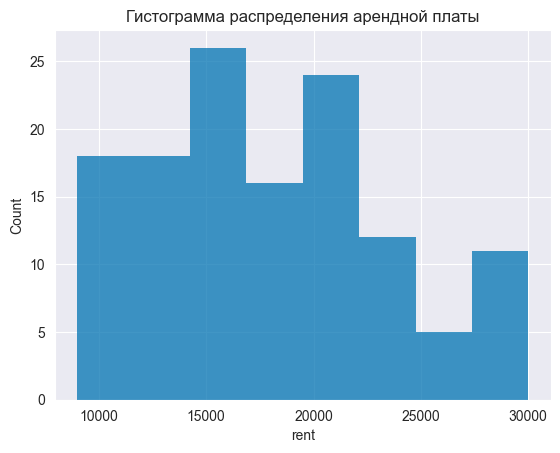

In [261]:
sns.histplot(df['rent'], bins=8)
plt.title('Гистограмма распределения арендной платы')
plt.show()

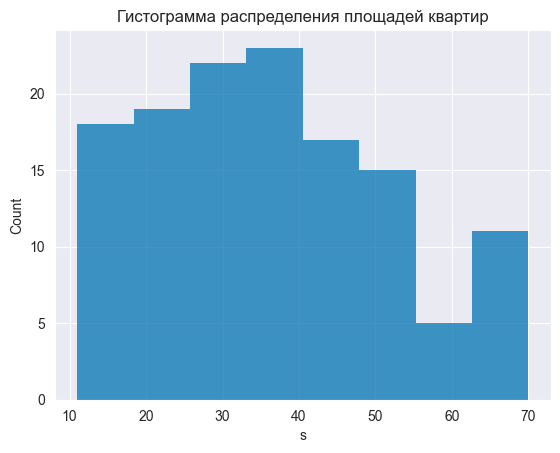

In [262]:
sns.histplot(df['s'], bins=8)
plt.title('Гистограмма распределения площадей квартир')
plt.show()

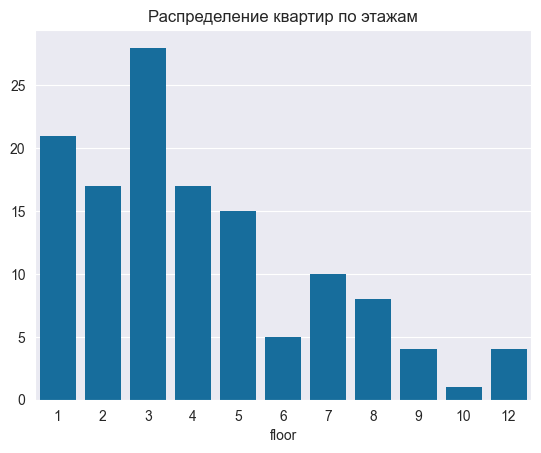

In [263]:
floors = df['floor'].value_counts().sort_index()

sns.barplot(x=floors.index, y=floors.values)
plt.title('Распределение квартир по этажам')
plt.show()

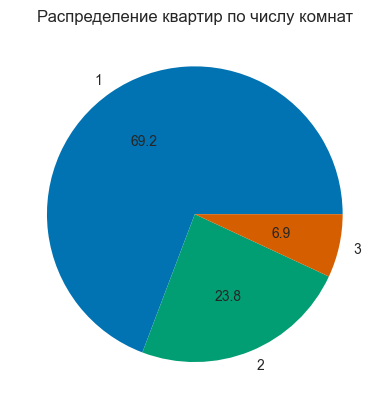

In [264]:
rooms = df['rooms'].value_counts().sort_index()

plt.pie(x=rooms.values, labels=rooms.index, autopct='%.1f')
plt.title('Распределение квартир по числу комнат')
plt.show()

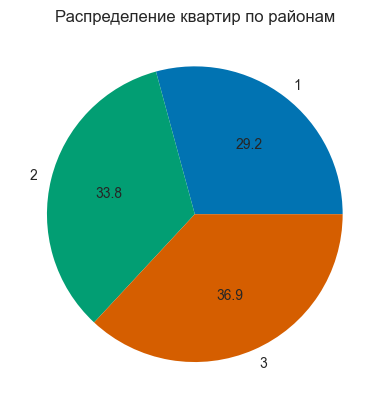

In [265]:
walls = df['district'].value_counts().sort_index()

plt.pie(x=walls.values, labels=walls.index, autopct='%.1f')
plt.title('Распределение квартир по районам')
plt.show()

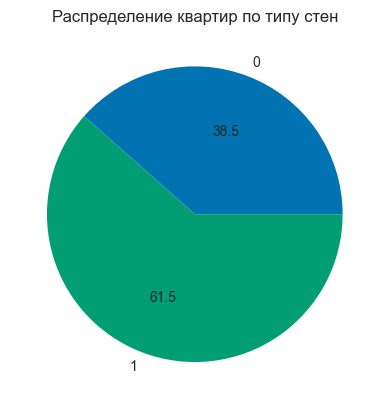

In [266]:
walls = df['walls'].value_counts().sort_index()

plt.pie(x=walls.values, labels=walls.index, autopct='%.1f')
plt.title('Распределение квартир по типу стен')
plt.show()

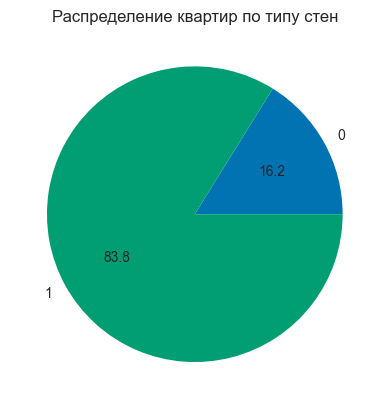

In [267]:
furnitures = df['furniture'].value_counts().sort_index()

plt.pie(x=furnitures.values, labels=furnitures.index, autopct='%.1f')
plt.title('Распределение квартир по типу стен')
plt.show()

## Описательные статистики

In [268]:
df[['floor', 'walls', 'district', 's', 'rent']].describe()

,floor,walls,district,s,rent
count,130.000000,130.000000,130.000000,130.000000,130.000000
mean,4.153846,0.615385,2.076923,36.439231,17890.384615
std,2.680569,0.488386,0.812837,15.753831,5608.686840
min,1.000000,0.000000,1.000000,11.000000,9000.000000
25%,2.000000,0.000000,1.000000,21.250000,13500.000000
50%,3.000000,1.000000,2.000000,36.000000,18000.000000
75%,5.000000,1.000000,3.000000,45.000000,21000.000000
max,12.000000,1.000000,3.000000,70.000000,30000.000000


Проверим на ассиметрию непрерывные признаки

In [269]:
df[['rent', 's']].skew()

rent    0.536873
s       0.328439
dtype: float64

Имеем небольшие правые хвосты, в целом - почти симметричное распределение

Проверим на эксцесс

In [270]:
df[['rent', 's']].kurtosis()

rent   -0.350727
s      -0.706654
dtype: float64

Оба распределения можно считать близкими к нормальному, но более плоскими, особенно что касается площади

## Проверка на нормальность

Выборка маленькая, поэтому используем критерий Шапиро-Уилка, гипотеза $H_0$ - что распределение нормальное

In [271]:
alpha = 0.05

p_val = stats.shapiro(df['rent'])[1]
print(f'Распределение "rent" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.1e})')

p_val = stats.shapiro(df['s'])[1]
print(f'Распределение "s" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.1e})')

Распределение "rent" - не нормальное (p_value = 9.6e-05)
Распределение "s" - не нормальное (p_value = 8.2e-04)


# 3. Сравнение групп

## 3.1. Анализ влияния категориальных признаков на rent

### Влияние walls на rent

In [272]:
# средняя аренда по типу стен
df.groupby('walls')[['rent']].mean()

,rent
walls,
0,17790.000
1,17953.125


C:\Users\torgovatel\AppData\Local\Temp\ipykernel_17700\3602683539.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='walls', y='rent', showmeans=True, palette=sns.color_palette('colorblind6', 2))


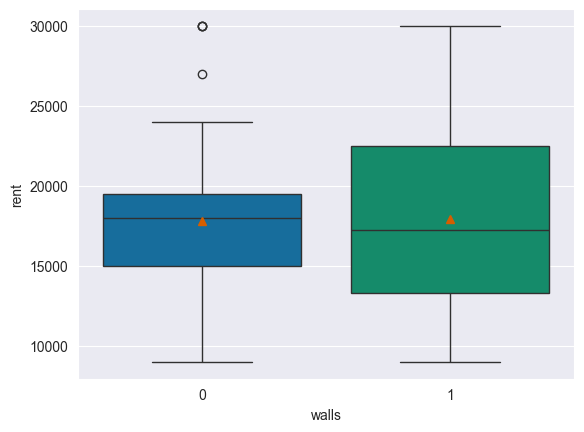

In [273]:
sns.boxplot(data=df, x='walls', y='rent', showmeans=True, palette=sns.color_palette('colorblind6', 2))
plt.show()

Проверим на нормальность

In [274]:
df_w0 = df[df['walls'] == 0]['rent']
df_w1 = df[df['walls'] == 1]['rent']

# 0
p_val = stats.shapiro(df_w0)[1]
print(f'Распределение "rent" по "walls == 0" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.1e})')

# 1
p_val = stats.shapiro(df_w1)[1]
print(f'Распределение "rent" по "walls == 1" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.1e})')

Распределение "rent" по "walls == 0" - не нормальное (p_value = 7.7e-03)
Распределение "rent" по "walls == 1" - не нормальное (p_value = 1.0e-03)


Проверим на схожесть распределений

In [275]:
p_val = scipy.stats.mannwhitneyu(df_w0, df_w1)[1]
print(f'Распределения "rent" по вариациям "walls" - {'' if p_val > alpha else 'не'} схожи (p_value = {p_val:.1f})')

Распределения "rent" по вариациям "walls" -  схожи (p_value = 0.8)


### Влияние furniture на rent

In [276]:
# средняя аренда по наличию мебели
df.groupby('furniture')[['rent']].mean()

,rent
furniture,
0,12535.714286
1,18922.018349


C:\Users\torgovatel\AppData\Local\Temp\ipykernel_17700\1900939230.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='furniture', y='rent', showmeans=True, palette=sns.color_palette('colorblind6', 2))


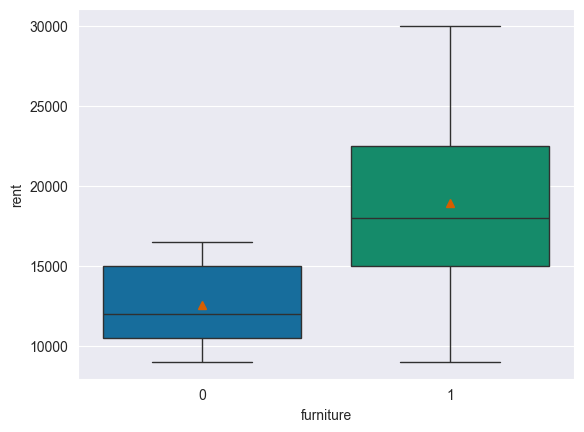

In [277]:
sns.boxplot(data=df, x='furniture', y='rent', showmeans=True, palette=sns.color_palette('colorblind6', 2))
plt.show()

Проверим нормальность

In [278]:
df_f0 = df[df['furniture'] == 0]['rent']
df_f1 = df[df['furniture'] == 1]['rent']

# 0
p_val = stats.shapiro(df_f0)[1]
print(f'Распределение "rent" по "furniture == 0" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.1e})')

# 1
p_val = stats.shapiro(df_f1)[1]
print(f'Распределение "rent" по "furniture == 1" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.1e})')

Распределение "rent" по "furniture == 0" - не нормальное (p_value = 1.9e-02)
Распределение "rent" по "furniture == 1" - не нормальное (p_value = 1.5e-03)


Проверим на схожесть распределений

In [279]:
p_val = scipy.stats.mannwhitneyu(df_f0, df_f1)[1]
print(f'Распределения "rent" по вариациям "furniture" - {'' if p_val > alpha else 'не'} схожи (p_value = {p_val:.1e})')

Распределения "rent" по вариациям "furniture" - не схожи (p_value = 2.0e-07)


### Влияние district на rent

In [280]:
# средняя аренда по району
df.groupby('district')[['rent']].mean()

,rent
district,
1,19894.736842
2,15375.000000
3,18609.375000


In [281]:
df['district'].value_counts()

district
3    48
2    44
1    38
Name: count, dtype: int64

C:\Users\torgovatel\AppData\Local\Temp\ipykernel_17700\3231177756.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='district', y='rent', showmeans=True, palette=sns.color_palette('colorblind6', 3))


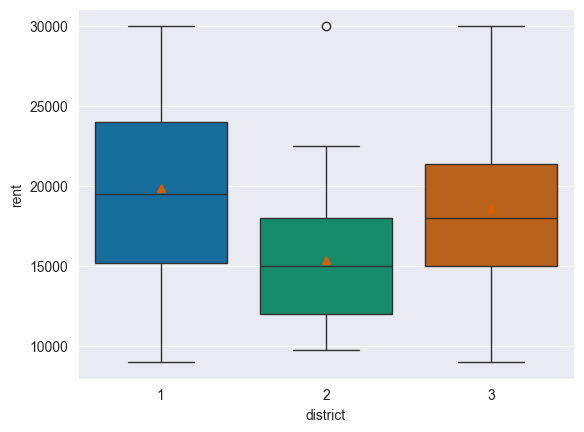

In [282]:
sns.boxplot(data=df, x='district', y='rent', showmeans=True, palette=sns.color_palette('colorblind6', 3))
plt.show()

Обработаем выброс

In [283]:
df.loc[(df['rent'] > 25000) & (df['district'] == 2)]

,rent,s,floor,rooms,district,walls,furniture
37,30000,64.0,3,3,2,0,1


In [284]:
df=df.drop(df.index[[37]])
df.reset_index(inplace=True)

Проверим на нормальность

In [285]:
df_d1 = np.array(df[df['district'] == 1]['rent'])
df_d2 = np.array(df[df['district'] == 2]['rent'])
df_d3 = np.array(df[df['district'] == 3]['rent'])

# 1
p_val = stats.shapiro(df_d1)[1]
print(f'Распределение "rent" по "district == 1" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.4f})')

# 2
p_val = stats.shapiro(df_d2)[1]
print(f'Распределение "rent" по "district == 2" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.4f})')

# 3
p_val = stats.shapiro(df_d3)[1]
print(f'Распределение "rent" по "district == 3" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.4f})')

Распределение "rent" по "district == 1" -  нормальное (p_value = 0.3939)
Распределение "rent" по "district == 2" - не нормальное (p_value = 0.0152)
Распределение "rent" по "district == 3" - не нормальное (p_value = 0.0335)


Пусть одно распределение нормальное, одно близко к нему а одно явно не нормальное, будем считать что в совокупности они не являются нормальными

Проверим схожесть медиан данных совокупностей по критерию Краскала-Уоллиса

In [286]:
p_val = stats.mstats.kruskalwallis(df_d1, df_d2, df_d3)[1]
print(f'Медианы распределения "rent" по вариациям "district" - {'' if p_val > alpha else 'не'} схожи (p_value = {p_val:.1e})')

Медианы распределения "rent" по вариациям "district" - не схожи (p_value = 2.6e-04)


## 3.2. Анализ влияния категориальных признаков на s

### Влияние walls на s

In [287]:
# средняя площадь по типу стен
df.groupby('walls')[['s']].mean()

,s
walls,
0,39.042857
1,34.500000


C:\Users\torgovatel\AppData\Local\Temp\ipykernel_17700\359022190.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='walls', y='s', showmeans=True, palette=sns.color_palette('colorblind6', 2))


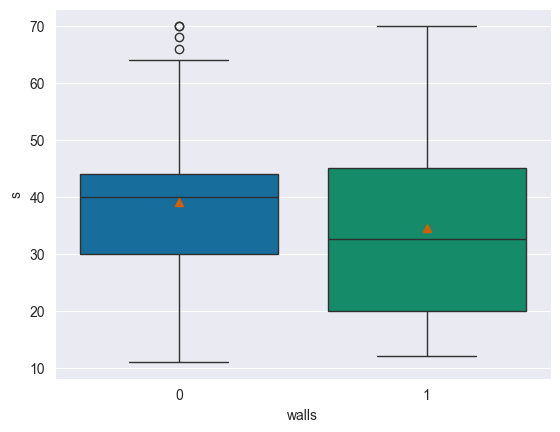

In [288]:
sns.boxplot(data=df, x='walls', y='s', showmeans=True, palette=sns.color_palette('colorblind6', 2))
plt.show()

Проверим на нормальность

In [289]:
df_w0 = df[df['walls'] == 0]['s']
df_w1 = df[df['walls'] == 1]['s']

# 0
p_val = stats.shapiro(df_w0)[1]
print(f'Распределение "s" по "walls == 0" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.3f})')

# 1
p_val = stats.shapiro(df_w1)[1]
print(f'Распределение "s" по "walls == 1" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.3f})')

Распределение "s" по "walls == 0" -  нормальное (p_value = 0.129)
Распределение "s" по "walls == 1" - не нормальное (p_value = 0.003)


Проверим на схожесть распределений

In [290]:
p_val = scipy.stats.mannwhitneyu(df_w0, df_w1)[1]
print(f'Распределения "s" по вариациям "walls" - {'' if p_val > alpha else 'не'} схожи (p_value = {p_val:.1f})')

Распределения "s" по вариациям "walls" -  схожи (p_value = 0.1)


### Влияние furniture на s

In [291]:
# средняя площадь по наличию мебели
df.groupby('furniture')[['s']].mean()

,s
furniture,
0,21.904762
1,39.010185


C:\Users\torgovatel\AppData\Local\Temp\ipykernel_17700\1368781031.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='furniture', y='s', showmeans=True, palette=sns.color_palette('colorblind6', 2))


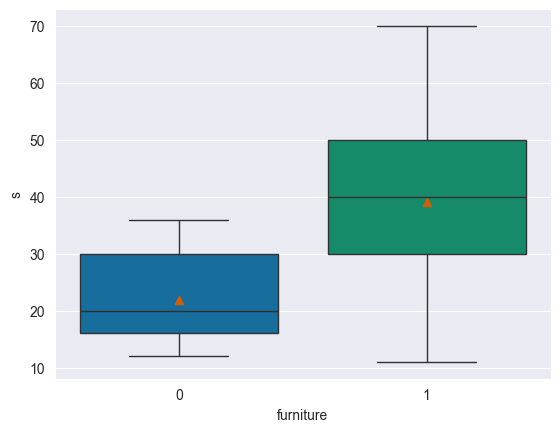

In [292]:
sns.boxplot(data=df, x='furniture', y='s', showmeans=True, palette=sns.color_palette('colorblind6', 2))
plt.show()

Проверим нормальность

In [293]:
df_f0 = df[df['furniture'] == 0]['s']
df_f1 = df[df['furniture'] == 1]['s']

# 0
p_val = stats.shapiro(df_f0)[1]
print(f'Распределение "s" по "furniture == 0" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.3f})')

# 1
p_val = stats.shapiro(df_f1)[1]
print(f'Распределение "s" по "furniture == 1" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.3f})')

Распределение "s" по "furniture == 0" - не нормальное (p_value = 0.010)
Распределение "s" по "furniture == 1" - не нормальное (p_value = 0.028)


Проверим на схожесть распределений

In [294]:
p_val = scipy.stats.mannwhitneyu(df_f0, df_f1)[1]
print(f'Распределения "s" по вариациям "furniture" - {'' if p_val > alpha else 'не'} схожи (p_value = {p_val:.1e})')

Распределения "s" по вариациям "furniture" - не схожи (p_value = 3.6e-06)


### Влияние district на rent

In [295]:
# средняя площадь по району
df.groupby('district')[['s']].mean()

,s
district,
1,37.078947
2,32.711628
3,38.697917


In [296]:
df['district'].value_counts()

district
3    48
2    43
1    38
Name: count, dtype: int64

C:\Users\torgovatel\AppData\Local\Temp\ipykernel_17700\1578706151.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='district', y='s', showmeans=True, palette=sns.color_palette('colorblind6', 3))


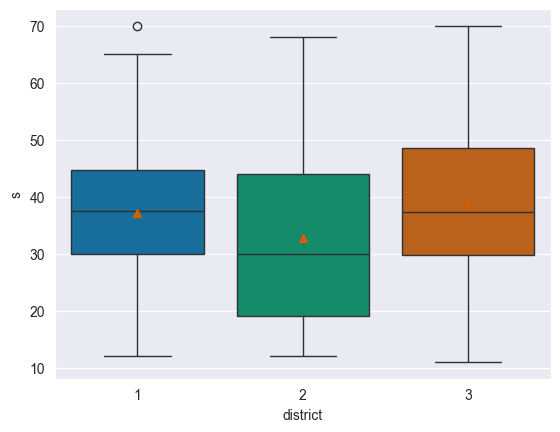

In [297]:
sns.boxplot(data=df, x='district', y='s', showmeans=True, palette=sns.color_palette('colorblind6', 3))
plt.show()

Обработаем выброс

In [298]:
df.loc[(df['s'] >= 70) & (df['district'] == 1)]

,index,rent,s,floor,rooms,district,walls,furniture
66,67,28500,70.0,9,3,1,1,1


In [299]:
df=df.drop(df.index[[66]])
df.reset_index(inplace=True)

Проверим на нормальность

In [300]:
df_d1 = np.array(df[df['district'] == 1]['s'])
df_d2 = np.array(df[df['district'] == 2]['s'])
df_d3 = np.array(df[df['district'] == 3]['s'])

# 1
p_val = stats.shapiro(df_d1)[1]
print(f'Распределение "s" по "district == 1" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.4f})')

# 2
p_val = stats.shapiro(df_d2)[1]
print(f'Распределение "s" по "district == 2" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.4f})')

# 3
p_val = stats.shapiro(df_d3)[1]
print(f'Распределение "s" по "district == 3" - {'' if p_val > alpha else 'не'} нормальное (p_value = {p_val:.4f})')

Распределение "s" по "district == 1" -  нормальное (p_value = 0.5862)
Распределение "s" по "district == 2" - не нормальное (p_value = 0.0047)
Распределение "s" по "district == 3" -  нормальное (p_value = 0.1030)


Имеем два нормальных распределения и одно явно не нормальное, что в совокупности следует воспринимать как не нормальное распределение

Проверим схожесть медиан данных совокупностей по критерию Краскала-Уоллиса

In [302]:
p_val = stats.mstats.kruskalwallis(df_d1, df_d2, df_d3)[1]
print(f'Медианы распределения "s" по вариациям "district" - {'' if p_val > alpha else 'не'} схожи (p_value = {p_val:.1e})')

Медианы распределения "s" по вариациям "district" -  схожи (p_value = 1.9e-01)
